In [1]:
# 사용한 라이브러리

import pandas
import matplotlib.pyplot as plt
import numpy
from sklearn.linear_model import LinearRegression
import seaborn
import platform

In [107]:
# 데이터 가져오기, 데이터 행렬 뒤집기

df = pandas.read_csv(r'D:\dbdpr\resources\변화율 데이터 테이블.csv')
df_transposed = df.T

if not df_transposed.empty:
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed[1:]
    df_transposed.reset_index(drop = True, inplace = True)

df_transposed

품목/변화율,총지수,식료품 및 비주류음료,주류 및 담배,의류 및 신발,"주택, 수도, 전기 및 연료",가정용품 및 가사 서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스
0,0.972,2.308,0.687,1.796,-0.815,1.553,0.985,-2.215,0.084,1.843,1.635,2.51,3.442
1,1.944,3.398,1.507,1.085,1.695,1.097,0.886,3.582,0.29,0.052,1.147,2.395,2.773
2,1.476,2.773,0.261,1.108,0.704,2.26,-0.052,2.419,-0.857,0.487,1.369,3.019,0.59
3,0.384,0.047,0.625,0.102,1.153,2.137,0.467,-1.793,-2.292,-0.246,0.524,1.818,1.605
4,0.54,4.43,0.32,0.74,0.51,0.03,1.51,-1.83,-2.07,-1.01,-2.13,0.95,1.96
5,2.5,5.89,0.43,0.56,1.63,1.87,-0.08,6.33,-0.9,0.43,0.87,2.73,2.0
6,5.09,5.91,2.18,3.13,5.47,4.82,0.84,9.73,0.93,2.85,1.35,7.59,6.15
7,3.59,5.47,0.98,6.7,5.08,5.41,1.63,-3.41,1.02,3.66,1.96,6.0,5.81
8,2.32,3.87,0.9,3.33,1.66,2.01,1.89,1.38,0.26,1.41,1.71,3.08,4.09


46
평균 변화율 : 0.289 %


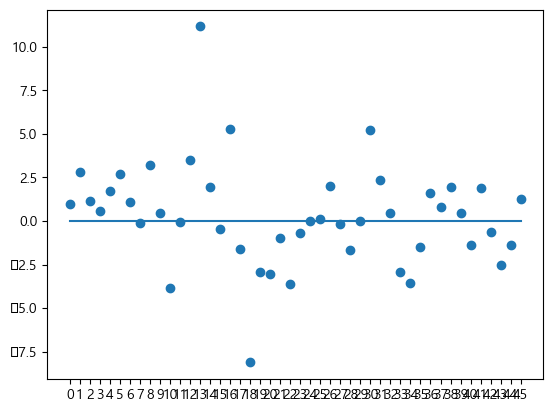

In [7]:
# 데이터 시각화

total = [0.971, 2.803, 1.118, 0.542, 1.704, 2.708, 1.096, -0.134, 3.213, 0.441, -3.834, -0.072, 3.479, 11.159, 1.954, -0.459, 5.258, -1.615, -8.122, -2.914, -3.058, -0.996, -3.635, -0.686, 0.004, 0.134, 2.02, -0.202, -1.671, -0.005, 5.223, 2.33, 0.465, -2.902, -3.553, -1.474, 1.583, 0.787, 1.947, 0.466, -1.399, 1.906, -0.626, -2.554, -1.392, 1.263]

# for i in df_transposed['총지수']:
#     total.append(i)

print(len(total))
X = numpy.array(total)
Y = numpy.array([str(i) for i in range(46)])
Y2 = numpy.array([i for i in range(46)])
LINE = numpy.array([0 for _ in range(46)])

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(Y, X)
plt.plot(LINE)

print('평균 변화율 :', round(sum(total) / len(total), 3), '%')

In [2]:
# 선형 회귀 모델

# 금리, 환율, 유가(휘발유), 유가(경유)
X = numpy.array(
    [
    # 금리 인상율(1달 미룸)
    # [0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 33.333, 25.0, 0.0, 0.0, 0.0, 20.0, 0.0, 16.667, 0.0, 14.286, 12.5, 0.0, 11.111, 10.0, 9.091, 8.333, 0.0, 7.692, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.143, -7.692, 0.0],

    # 현금 통화
    # [-0.3, 2.704, 0.87, 0.864, 1.0, 1.135, 1.052, 0.922, 2.102, 1.21, 1.172, -1.185, 4.304, -0.118, 0.743, 0.692, 0.898, 0.514, 0.368, 0.324, -0.003, -0.729, -0.812, -1.91, 1.86, -0.392, 0.506, 0.508, 0.314, 0.378, 0.399, 0.493, 0.139, 0.812, 0.844, 0.795, -1.273, 2.498, 0.417, 0.267, 0.435, 0.528, 0.503, 0.146, 0.946, 0.799],

    # 실업률
    # [-14.035, -12.245, -6.977, 0.0, -5.0, -15.789, -18.75, 3.846, 3.704, -7.143, 34.615, 17.143, -17.073, -11.765, 0.0, 0.0, 0.0, -3.333, -27.586, 14.286, 0.0, -4.167, 30.435, 20.0, -13.889, -6.452, -3.448, -3.571, 0.0, 0.0, -25.926, 15.0, -8.696, 9.524, 43.478, 12.121, -13.514, -6.25, 0.0, 0.0, -3.333, -13.793, -24.0, 10.526, 9.524, -4.348],

    # 환율 데이터
    [1.297, 0.691, 0.17, 0.177, 0.689, 1.146, 1.43, 0.793, 1.135, 0.008, 0.067, 0.871, 0.363, 1.893, 0.926, 1.21, 1.814, 0.068, 0.52, 0.701, 0.771, 0.038, 0.561, 0.134, 0.128, 0.229, 0.614, 0.002, 0.117, 0.27, 0.351, 0.095, 0.093, 0.078, 0.231, 1.189, 0.256, 0.506, 0.228, 0.095, 0.114, 0.064, 0.54, 0.357, 0.235, 0.454],

    # 본원 통화
    [3.177, 0.477, -0.388, 1.69, 2.429, -0.291, 0.876, 1.282, 2.695, -0.517, 1.079, 2.175, -0.155, 0.155, 1.78, 0.342, 0.038, 3.258, -2.605, 0.565, 1.536, -3.615, 0.306, -0.534, -0.115, -1.459, 0.273, 2.021, -0.838, 1.729, -0.944, 0.076, 0.305, -1.937, 1.472, 0.802, 1.515, 0.261, -0.707, 1.199, -0.222, 1.633, -0.475, 0.807, 0.182, -0.509],

    # 유가(휘발유)
    [1.483, 3.421, 1.404, 0.456, 2.324, 3.292, 1.012, -0.187, 4.239, 1.464, -5.239, -0.677, 4.855, 13.055, 1.964, -0.479, 5.944, -2.592, -11.714, -3.47, -3.662, -0.98, -5.25, -0.048, 0.996, 0.872, 3.059, -0.74, -2.957, 0.306, 8.28, 3.052, 0.381, -5.171, -4.957, -1.957, 2.884, 1.523, 2.971, 0.574, -2.362, 3.002, -0.928, -4.084, -1.902, 2.322],

    # 유가(경유)
    [1.691, 3.9, 1.532, 0.455, 2.655, 3.724, 1.052, -0.234, 5.018, 2.679, -5.215, -1.046, 5.718, 18.891, 4.351, 3.035, 6.351, -0.197, -9.382, -2.07, -0.641, 2.22, -5.105, -6.048, -4.116, -4.151, -0.261, -4.15, -5.264, 0.143, 12.652, 5.935, 1.427, -3.673, -6.259, -3.03, 2.546, 1.398, 1.222, -1.167, -3.381, 3.692, -0.882, -4.62, -2.522, 2.786],
    ]
)

# 소비자 물가 지수
Y2 = numpy.array([0.534, 0.256, 0.137, 0.069, 0.0, 0.206, 0.479, 0.409, 0.174, 0.503, 0.164, 0.779, 0.544, 0.645, 0.688, 0.627, 0.66, 0.481, -0.092, 0.175, 0.312, -0.082, 0.174, 0.741, 0.236, 0.172, 0.226, 0.325, 0.027, 0.117, 0.89, 0.508, 0.372, -0.521, 0.044, 0.39, 0.539, 0.149, 0.053, 0.079, -0.228, 0.255, 0.359, 0.096, 0.035, -0.253])

model = LinearRegression()
model.fit(X.T, Y2.reshape(-1, 1))

# 모델(선형 회귀)

print('절편(b) :', model.intercept_[0])
print('회귀 계수 :', model.coef_)

b = model.intercept_[0]
w = model.coef_

model.predict(X.T)
model.score(X.T, Y2.reshape(-1, 1))

절편(b) : 0.17835904841144312
회귀 계수 : [[0.11770982 0.04759305 0.0220467  0.00542832]]


0.3409740054792002

--- 상관계수 행렬 (소비자물가지수 기준) ---
소비자물가지수       1.000000
유가(휘발유)       0.484662
유가(경유)        0.469142
유가(고급 휘발유)    0.466478
유가(실내 등유)     0.459793
환율            0.403200
금리인상율         0.371553
본원 통화         0.313238
고용율           0.030921
현금 통화        -0.131855
실업률          -0.138349
lf           -0.258152
Name: 소비자물가지수, dtype: float64


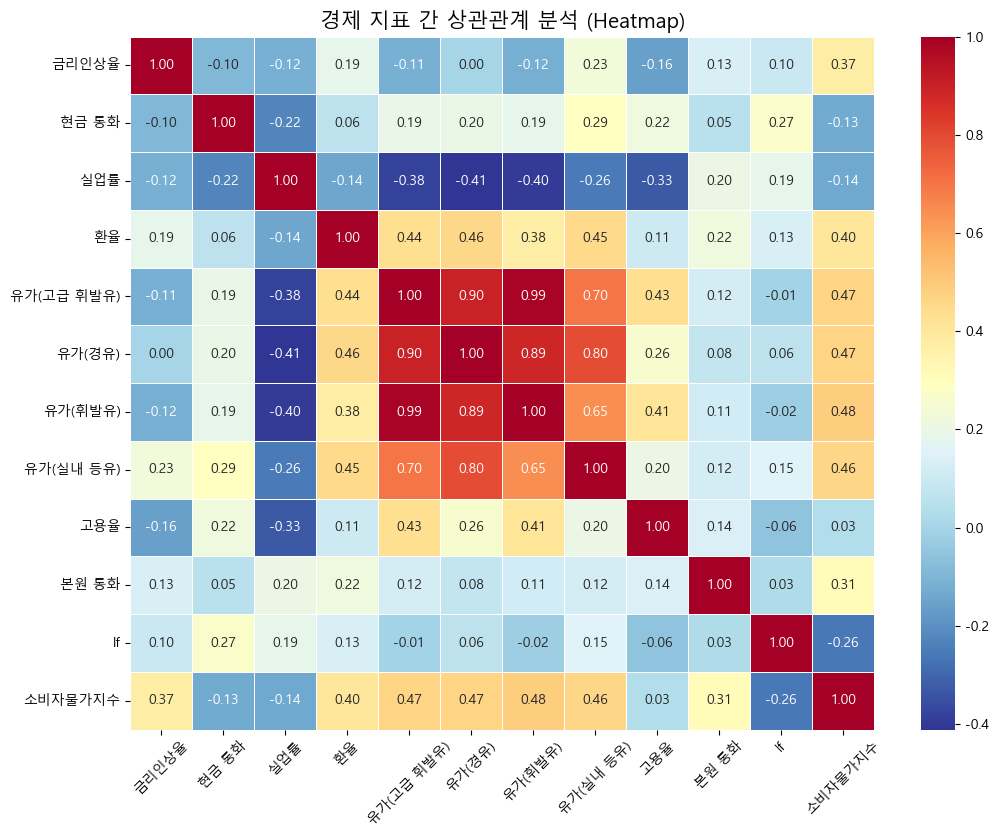

In [ ]:
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic') # 윈도우: 맑은 고딕

elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')   # 맥: 애플고딕

else:
    plt.rc('font', family='NanumGothic')   # 리눅스/코랩: 나눔고딕

plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 정의
X = numpy.array([
    # 금리 인상율
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 33.333, 0.0, 25.0, 0.0, 0.0, 20.0, 16.667, 0.0, 28.571, 11.111, 0.0, 20.0, 8.333, 0.0, 7.692, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.143, -7.692],

    # 현금 통화
    [-0.3, 2.704, 0.87, 0.864, 1.0, 1.135, 1.052, 0.922, 2.102, 1.21, 1.172, -1.185, 4.304, -0.118, 0.743, 0.692, 0.898, 0.514, 0.368, 0.324, -0.003, -0.729, -0.812, -1.91, 1.86, -0.392, 0.506, 0.508, 0.314, 0.378, 0.399, 0.493, 0.139, 0.812, 0.844, 0.795, -1.273, 2.498, 0.417, 0.267, 0.435, 0.528, 0.503, 0.146, 0.946, 0.799],

    # 실업률
    [-14.035, -12.245, -6.977, 0.0, -5.0, -15.789, -18.75, 3.846, 3.704, -7.143, 34.615, 17.143, -17.073, -11.765, 0.0, 0.0, 0.0, -3.333, -27.586, 14.286, 0.0, -4.167, 30.435, 20.0, -13.889, -6.452, -3.448, -3.571, 0.0, 0.0, -25.926, 15.0, -8.696, 9.524, 43.478, 12.121, -13.514, -6.25, 0.0, 0.0, -3.333, -13.793, -24.0, 10.526, 9.524, -4.348],

    # 환율 데이터
    [1.297, 0.691, 0.17, 0.177, 0.689, 1.146, 1.43, 0.793, 1.135, 0.008, 0.067, 0.871, 0.363, 1.893, 0.926, 1.21, 1.814, 0.068, 0.52, 0.701, 0.771, 0.038, 0.561, 0.134, 0.128, 0.229, 0.614, 0.002, 0.117, 0.27, 0.351, 0.095, 0.093, 0.078, 0.231, 1.189, 0.256, 0.506, 0.228, 0.095, 0.114, 0.064, 0.54, 0.357, 0.235, 0.454],

    # 유가(고급 휘발유)
    [0.971, 2.803, 1.118, 0.542, 1.704, 2.708, 1.096, -0.134, 3.213, 0.441, -3.834, -0.072, 3.479, 11.159, 1.954, -0.459, 5.258, -1.615, -8.122, -2.914, -3.058, -0.996, -3.635, -0.686, 0.004, 0.134, 2.02, -0.202, -1.671, -0.005, 5.223, 2.33, 0.465, -2.902, -3.553, -1.474, 1.583, 0.787, 1.947, 0.466, -1.399, 1.906, -0.626, -2.554, -1.392, 1.263],

    # 유가(경유)
    [1.691, 3.9, 1.532, 0.455, 2.655, 3.724, 1.052, -0.234, 5.018, 2.679, -5.215, -1.046, 5.718, 18.891, 4.351, 3.035, 6.351, -0.197, -9.382, -2.07, -0.641, 2.22, -5.105, -6.048, -4.116, -4.151, -0.261, -4.15, -5.264, 0.143, 12.652, 5.935, 1.427, -3.673, -6.259, -3.03, 2.546, 1.398, 1.222, -1.167, -3.381, 3.692, -0.882, -4.62, -2.522, 2.786],

    # 유가(휘발유)
    [1.483, 3.421, 1.404, 0.456, 2.324, 3.292, 1.012, -0.187, 4.239, 1.464, -5.239, -0.677, 4.855, 13.055, 1.964, -0.479, 5.944, -2.592, -11.714, -3.47, -3.662, -0.98, -5.25, -0.048, 0.996, 0.872, 3.059, -0.74, -2.957, 0.306, 8.28, 3.052, 0.381, -5.171, -4.957, -1.957, 2.884, 1.523, 2.971, 0.574, -2.362, 3.002, -0.928, -4.084, -1.902, 2.322],

    # 유가(실내 등유)
    [1.672, 2.164, 0.927, 0.088, 0.832, 1.995, 0.935, 0.22, 5.309, 9.559, 0.633, 0.299, 6.679, 15.057, 5.936, 3.662, 8.22, 5.293, -2.79, -1.18, -1.363, 0.227, -3.068, -3.691, -2.062, -2.593, -1.59, -1.812, -3.045, -1.406, 1.668, 3.7, 3.154, -0.461, -2.58, -2.163, 0.094, 0.353, 0.13, -0.244, -0.897, 0.078, -0.172, -1.372, -1.648, -0.021],

    # 고용율
    [0.348, 0.867, 0.859, 0.681, 0.508, 0.337, -0.168, -0.336, -0.169, -0.338, -0.169, -0.34, 0.341, 0.849, 0.842, 0.668, 0.498, 0.33, -0.164, -0.329, -0.165, -0.331, -0.166, -0.333, 0.334, 0.832, 0.825, 0.655, 0.488, 0.324, -0.161, -0.323, -0.162, -0.325, -0.163, -0.326, 0.327, 0.816, 0.809, 0.642, 0.478, 0.317, -0.158, -0.317, -0.159, -0.318],

    # 본원 통화
    [3.177, 0.477, -0.388, 1.69, 2.429, -0.291, 0.876, 1.282, 2.695, -0.517, 1.079, 2.175, -0.155, 0.155, 1.78, 0.342, 0.038, 3.258, -2.605, 0.565, 1.536, -3.615, 0.306, -0.534, -0.115, -1.459, 0.273, 2.021, -0.838, 1.729, -0.944, 0.076, 0.305, -1.937, 1.472, 0.802, 1.515, 0.261, -0.707, 1.199, -0.222, 1.633, -0.475, 0.807, 0.182, -0.509],

    # lf
    [0.896, 1.271, 0.986, 0.419, 0.91, 0.961, 0.744, 0.776, 0.445, 1.273, 0.684, 0.75, 0.307, 0.456, 0.062, 0.555, 0.568, 0.382, 0.292, 0.307, 0.189, 0.663, 0.145, 0.058, -0.083, 0.446, -0.002, -0.161, 0.24, 0.76, -0.097, 0.397, 0.025, 0.966, 1.305, 0.371, 0.272, 1.053, 0.277, -0.16, 0.505, 0.415, -0.35, 0.522, 0.824, 0.884]
])

Y2 = numpy.array([0.534, 0.256, 0.137, 0.069, 0.0, 0.206, 0.479, 0.409, 0.174, 0.503, 0.164, 0.779, 0.544, 0.645, 0.688, 0.627, 0.66, 0.481, -0.092, 0.175, 0.312, -0.082, 0.174, 0.741, 0.236, 0.172, 0.226, 0.325, 0.027, 0.117, 0.89, 0.508, 0.372, -0.521, 0.044, 0.39, 0.539, 0.149, 0.053, 0.079, -0.228, 0.255, 0.359, 0.096, 0.035, -0.253])

# 2. 데이터 프레임 생성
columns = ['금리인상율', '현금 통화', '실업률', '환율', '유가(고급 휘발유)', '유가(경유)', '유가(휘발유)', '유가(실내 등유)', '고용율', '본원 통화', 'lf']
df = pandas.DataFrame(X.T, columns = columns)
df['소비자물가지수'] = Y2

# 3. 상관계수 계산
correlation_matrix = df.corr()

# 4. 텍스트 결과 출력
print("--- 상관계수 행렬 (소비자물가지수 기준) ---")
print(correlation_matrix['소비자물가지수'].sort_values(ascending = False))

# 5. 히트맵 시각화

plt.figure(figsize = (12, 9))
seaborn.heatmap(correlation_matrix, annot = True, cmap = 'RdYlBu_r', fmt = ".2f", linewidths = 0.5)
plt.title('경제 지표 간 상관관계 분석 (Heatmap)', fontsize = 15)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
# 모델 실험

inputs = list(map(float, input().split()))

print(round(
            b + sum(inputs[i] * w[0][i] for i in range(len(inputs)))
            , 3))

# 2024(1월) 2025(1월) -> 2.26 % 상승

# 2024(1월) 2025(1월)
# 달러-원 환율(평균) +13.3%
# 본원통화(평잔) +6.9%
# 휘발유(전국평균) +8.9%
# 경유(전국평균) +5.6%

# 예측 : 2.3 % 상승

2.299
